***Библиотеки***

In [25]:
from ast import While
from cmath import sqrt
from unittest.util import _MIN_DIFF_LEN
from sympy.tensor.array import derive_by_array
from scipy import optimize
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
import scipy.optimize as opt

***Исходные данные***

In [26]:
alpha = 5
def Rosenbrock(X):
    return alpha * (X[0]**2 - X[1])**2 + (X[0] - 1)**2

def f1(X):
    return 10*X[0]**2 - 4* X[0] * X[1] + 7 * X[1]**2 - 4 * math.sqrt(5) * (5*X[0] -X[1]) - 16    

def f2(X):
    return 6*X[0]**2 - 4* X[0] * X[1] + 3 * X[1]**2 + 4 * math.sqrt(5) * (X[0] +  2* X[1]) +22    

def f1(x, y):
     return 10*x**2-4*x*y+7*y**2-4*5**(1/2)*(5*x-y)-16
def f2(x, y):
     return 6*x**2-4*x*y+3*y**2+4*5**(1/2)*(x+2*y)+22
def Rosenbrock(x, y):
     return alpha * (x**2-y)**2 + (x - 1)**2

# Начальная точка поиска минимума функции
X0 = np.array([-3, 3])
eps = 0.001
# регулярный симплекс
delta = 0.5
# нерегулярный симплекс
alp = 1
beta = 2
gamma = 0.5

f = Rosenbrock

***Рисование***

In [27]:
# 3D и линии уровня одного графика
def Draw6(X_, X_p, Y_p, k):

    delta = 1
    X, Y = np.meshgrid(np.linspace(min(X_p) - delta, max(X_p) + delta,  100),
                       np.linspace(min(Y_p) - delta, max(Y_p) + delta, 100))
    Z = f(X, Y)

    # Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize=(16, 8))

    # Surface plot
    # ax = fig.add_subplot(1, 2, 1, projection='3d')
    # ax.plot_surface(X, Y, Z, rstride=5, cstride=5,
    #                 cmap='jet', alpha=.4, edgecolor='none')
    # ax.plot(X_p, Y_p, f(X_p, Y_p), color='r', marker='*', alpha=.4)

    # # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    # ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*',
    #            c='red', label='X0 - начальное приближение')
    # ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*',
    #            c='black', label='X - точка минимума')
    # ax.legend(shadow=True, fontsize=8)
    # ax.view_init(15, 60)
    # ax.set_xlabel('$x$')
    # ax.set_ylabel('$y$')
    # ax.set_zlabel('$z$')
    # ax.set_title('Поверхность данной функции')

    # # Contour plot
    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, levels=sorted(set(Val(X_p, Y_p))), cmap='jet')

    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color='r', marker='*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy,
              scale_units='xy', angles='xy', scale=1, color='r', alpha=.3)
    if k == 1:
        fig.canvas.manager.set_window_title(
            'Метод циклического покоординатного спуска')
        ax.set_title('Метод циклического покоординатного спуска')
    elif k == 2:
        fig.canvas.manager.set_window_title('Метод Хука - Дживса')
        ax.set_title('Метод Хука - Дживса')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Розенброка')
        ax.set_title('Метод Розенброка')


# 3D и линии уровня двух графиков
def DrawSurfContour5(X2, X3, X4, X2_p, Y2_p, X3_p, Y3_p, X4_p, Y4_p):
    fig = plt.figure(figsize=(16, 8 ))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    fig.canvas.manager.set_window_title('Квазиньютоновские методы')

    
    # Angles needed for quiver plot
    anglesx2 = X2_p[1:] - X2_p[:-1]
    anglesy2 = Y2_p[1:] - Y2_p[:-1]
    delta = 1.5
    X = np.linspace(np.min(X2_p) - delta, np.max(X2_p) + delta,  100)
    Y = np.linspace(np.min(Y2_p) - delta, np.max(Y2_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels=Val(X2_p, Y2_p))
    axes1.quiver(X2_p[:-1], Y2_p[:-1], anglesx2, anglesy2,
              scale_units='xy', angles='xy', scale=1, color='r', alpha=.3)
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('$x$')
    axes1.set_ylabel('$y$')
    axes1.set_title('ДФП')


 # Angles needed for quiver plot
    anglesx3 = X3_p[1:] - X3_p[:-1]
    anglesy3 = Y3_p[1:] - Y3_p[:-1]
    delta = 1.5
    X = np.linspace(np.min(X3_p) - delta, np.max(X3_p) + delta,  100)
    Y = np.linspace(np.min(Y3_p) - delta, np.max(Y3_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels=Val(X3_p, Y3_p))
    axes2.quiver(X3_p[:-1], Y3_p[:-1], anglesx3, anglesy3,
              scale_units='xy', angles='xy', scale=1, color='r', alpha=.3)
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('$x$')
    axes2.set_ylabel('$y$')
    axes2.set_title('БФШ')


# Angles needed for quiver plot
    anglesx4 = X4_p[1:] - X4_p[:-1]
    anglesy4 = Y4_p[1:] - Y4_p[:-1]
    delta = 1.5
    X = np.linspace(np.min(X4_p) - delta, np.max(X4_p) + delta,  100)
    Y = np.linspace(np.min(Y4_p) - delta, np.max(Y4_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels=Val(X4_p, Y4_p))
    axes3.quiver(X4_p[:-1], Y4_p[:-1], anglesx4, anglesy4,
              scale_units='xy', angles='xy', scale=1, color='r', alpha=.3)
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('$x$')
    axes3.set_ylabel('$y$')
    axes3.set_title('Метод Пауэлла')


# 3D и линии уровня одного графика
def Draw5(X_, X_p, Y_p, k):

    delta = max(abs(X_[0] - X0[0]), abs(X_[1] - X0[1]))
    X = np.linspace(np.min(X_p) - delta, np.max(X_p) + delta,  100)
    Y = np.linspace(np.min(Y_p) - delta, np.max(Y_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)


    # Angles needed for quiver plot
    anglesx = X_p[1:] - X_p[:-1]
    anglesy = Y_p[1:] - Y_p[:-1]

    fig = plt.figure(figsize=(16, 8))

    # Surface plot
    # ax = fig.add_subplot(1, 2, 1, projection='3d')
    # ax.plot_surface(X, Y, Z, rstride=5, cstride=5,
    #                 cmap='jet', alpha=.4, edgecolor='none')
    # ax.plot(X_p, Y_p, f(X_p, Y_p), color='r', marker='*', alpha=.4)

    # # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor = 'none')
    # ax.scatter(X0[0], X0[1], f(X0[0], X0[1]), s=20, marker='*',
    #            c='red', label='X0 - начальное приближение')
    # ax.scatter(X_[0], X_[1], f(X_[0], X_[1]), s=20, marker='*',
    #            c='black', label='X - точка минимума')
    # ax.legend(shadow=True, fontsize=8)
    # ax.view_init(15, 60)
    # ax.set_xlabel('$x$')
    # ax.set_ylabel('$y$')
    # ax.set_zlabel('$z$')
    # ax.set_title('Поверхность данной функции')


    delta = 1.5
    X = np.linspace(np.min(X_p) - delta, np.max(X_p) + delta,  100)
    Y = np.linspace(np.min(Y_p) - delta, np.max(Y_p) + delta, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    # Contour plot
    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, levels=Val(X_p, Y_p), cmap='jet')

    # Plotting the iterations and intermediate values
    ax.scatter(X_p, Y_p, color='r', marker='*')
    ax.quiver(X_p[:-1], Y_p[:-1], anglesx, anglesy,
              scale_units='xy', angles='xy', scale=1., color='r', alpha=.3)
    if k == 1:
        fig.canvas.manager.set_window_title('Давидона - Флетчера - Пауэлла')
        ax.set_title('Давидона - Флетчера - Пауэлла')
    elif k == 2:
        fig.canvas.manager.set_window_title('Бройдена - Флетчера - Шенно')
        ax.set_title('Бройдена - Флетчера - Шенно')
    elif k == 3:
        fig.canvas.manager.set_window_title('Метод Пауэлла')
        ax.set_title('Метод Пауэлла')

# 3D и линии уровня двух графиков
def DrawSurfContour6(X2, X3, X4, X2_p, Y2_p, i1, n1, X3_p, Y3_p, i2, n2, X4_p, Y4_p, i3, n3):
    fig = plt.figure(figsize=(16, 8))
    # fig.canvas.manager.full_screen_toggle()

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    fig.canvas.manager.set_window_title('Прямой поиск')

    delta = max(abs(X2[0] - X0[0]), abs(X2[1] - X0[1])) + 4
    X, Y = np.meshgrid(np.linspace(X2[0] - delta, X2[0] + delta, 50),
                       np.linspace(X2[1] - delta, X2[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes1.contour(X, Y, Z, levels=Val(X2_p, Y2_p))
    axes1.plot(X2_p, Y2_p, marker='o', markersize=3, color='red')
    axes1.set_xlabel('i = ' +str(i1) + ', n = ' + str(n1))
    axes1.set_title('ЦПС')

    delta = max(abs(X3[0] - X0[0]), abs(X3[1] - X0[1])) + 4
    X, Y = np.meshgrid(np.linspace(X3[0] - delta, X3[0] + delta, 50),
                       np.linspace(X3[1] - delta, X3[1] + delta, 50))
    # X, Y = np.meshgrid(X_p1, Y_p1)
    Z = f(X, Y)
    axes2.contour(X, Y, Z, levels=Val(X3_p, Y3_p))
    axes2.plot(X3_p, Y3_p, marker='o', markersize=3, color='red')
    axes2.set_xlabel('i = ' +str(i2) + ', n = ' + str(n2))
    axes2.set_title('Хука-Дживса')

    delta = max(abs(X4[0] - X0[0]), abs(X4[1] - X0[1])) + 4
    X, Y = np.meshgrid(np.linspace(X4[0] - delta, X4[0] + delta, 50),
                       np.linspace(X4[1] - delta, X4[1] + delta, 50))
    # X, Y = np.meshgrid(X_p2, Y_p2)
    Z = f(X, Y)
    axes3.contour(X, Y, Z, levels=Val(X4_p, Y4_p))
    axes3.plot(X4_p, Y4_p, marker='o', markersize=3, color='red')
    axes3.set_xlabel('i = ' +str(i3) + ', n = ' + str(n3))
    axes3.set_title('Метод Розенброка')

# Таблица точек и значений
def DrawPoints(X_p, Y_p):
    for x in range(len(X_p)):
        print('X = [', '%.6f' % X_p[x], ' ', '%.6f' %
              Y_p[x], ']', '\tf = ', '%.6f' % f(X_p[x], Y_p[x]))

def DrawA(A_p):
    x = 0
    while x < len(A_p):
        print(A_p[x], ' ', A_p[x + 1])
        print(A_p[x + 2], ' ', A_p[x + 3])
        x += 4
    print()

# Значения функции
def Val(X_p, Y_p):
    Value = []
    for i in range(len(X_p)):
        Value.insert(0, f(X_p[i], Y_p[i]))
    return np.sort(Value)


In [28]:
from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd

def plpl(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    tmp = [1,1]
    for i in range(len(x)):
        #print(i)
        if i > 0:
            if c[-1] != foo([x[i],y[i]]):     
                c.append(foo([x[i],y[i]]))
        else:
            c.append(foo([x[i],y[i]]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def plpl1(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    tmp = [1,1]
    for i in range(len(x)):
        #print(i)
        
        c.append(foo([x[i],y[i]]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def draw_counterplot(x_min, xk, flag, foo):
    fig, ax = plt.subplots(figsize = (16,8))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo([x,y])

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = sorted(set(Val(xk[0],xk[1]))))
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    if flag==1:
        ax.set_title('Регулярный поиск' , fontdict = {'fontsize' : 14})
    else:
        ax.set_title('Нерегулярный поиск' , fontdict = {'fontsize' : 14})
    # создадим сетку 
    ax.grid(linestyle = '-')



    pass


def draw_plot(xk, foo, levels_mas, flag):

    fig, ax = plt.subplots(figsize = (16,8))
    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    x, y = np.meshgrid(x ,y)
    z = foo([x,y])

    v = plpl(foo, levels_mas[0], levels_mas[1])
    v = list(set(v))

    v.sort()
    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    
    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    if flag==1:
        ax.set_title('Регулярный поиск' , fontdict = {'fontsize' : 14})
    else:
        ax.set_title('Нерегулярный поиск' , fontdict = {'fontsize' : 14})
    # создадим сетку 
    ax.grid(linestyle = '-')
    plt.show()




def draw_counterplot1(x_min, xk, A, flag, foo):
    fig, ax = plt.subplots(figsize = (5,5))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo([x,y])

    v = plpl(foo, xk[0], xk[1])
    v = list(set(v))
    v.sort()

    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')

    for k in range(1,len(A[0])):
        
        ax.plot ([A[0][k-1],A[0][k]], [A[1][k-1],A[1][k]], marker='o', markersize = 3, color = 'green')
        #ax.plot (A[0][k], A[1][k], marker='o', markersize = 3, color = 'green')


    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    if flag==1:
        ax.set_title('Регулярный поиск' , fontdict = {'fontsize' : 14})
    else:
        ax.set_title('Нерегулярный поиск' , fontdict = {'fontsize' : 14})
    # создадим сетку 
    ax.grid(linestyle = '-')



    pass

def draw_all(x0, x_min, xk, flag, foo, ang_a = 20, ang_b = 145):

    fig = plt.figure(figsize = (15, 5), dpi=120)

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)
    #ax3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.7)

    coef = max(abs(x0[0] - x_min[0]), abs(x0[1]-x_min[1]))
    #coef = max(abs( min(xk[0]) - x_min[0]), abs(min(xk[1])-x_min[1]))
    x, y = np.meshgrid(np.linspace(x_min[0] - coef, x_min[0] + coef, 100),np.linspace(x_min[1] - coef, x_min[1] + coef, 100))
    z = foo(x, y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    

    ax1.plot_surface(x,y,z, cmap = 'plasma', alpha = 0.5)
    ax1.contour3D(x,y,z, 120, cmap = 'plasma', alpha = 0.3)
    ax1.contour3D(x,y,z, levels = v, colors = 'black', alpha = 0.5) #cmap = 'tab20')

    v = plpl1(foo, xk[0], xk[1])
    
    ax1.plot(xk[0], xk[1], v, marker='o', markersize = 3, color = 'red')

    ax1.scatter(xk[0][0], xk[1][0], foo(xk[0][0], xk[1][0]), s = 20, c = 'green', label="$x_{beg}$ - точка начального приближения")
    ax1.scatter(x_min[0], x_min[1], foo(x_min[0], x_min[1]), s = 20, c = 'red', label="$x_{min}$ - точка минимума")
    ax1.legend(shadow=True, fontsize=8)
    ax1.view_init(ang_a, ang_b)
    ax1.set_xlabel('$x$', fontsize = 12)
    ax1.set_ylabel('$y$', fontsize = 12)
    ax1.set_zlabel('$z$', fontsize = 12)
    ax1.set_title('График поверхности функции', fontdict = {'fontsize' : 14})


    #x, y = np.meshgrid(xk[0], xk[1])
    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    # построим линии уровня
    ax2.contour(x, y, z, v)
    # траектория поиска точки минимума
    ax2.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax2.set_xlabel('$x$', fontsize = 12)
    ax2.set_ylabel('$y$', fontsize = 12)
    ax2.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax2.grid(linestyle = '-')

    # k = range(len(w_norm))
    # #x, y = np.meshgrid(k , w_norm)
    # ax3.plot(k, w_norm)
    # ax3.set_xlabel('$k$')
    # ax3.set_ylabel('$ \| \! \| w_k \| \! \| $')
    # ax3.set_title('Зависимость нормы \n антиградиента $ \| \! \| w_k \| \! \| $ от параметра $k$')



    pass

***Доп. функции***

In [29]:
# Вычисление градиента:
x_sym, y_sym = sp.Symbol('x'), sp.Symbol('y')
Grad_f = derive_by_array(f(x_sym, y_sym), [x_sym, y_sym])
Grad_f = sp.lambdify((x_sym, y_sym), Grad_f, 'numpy')

# Вычисление гессиана
Hessian_f = derive_by_array(derive_by_array(
    f(x_sym, y_sym), [x_sym, y_sym]), [x_sym, y_sym])
Hessian_f = sp.lambdify((x_sym, y_sym), Hessian_f, 'numpy')

***Квазиньютоновские методы***

                      Методы второго порядка
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 5*(x**2 - y)**2
Начальное приближение:  X =  [-3  3]
Точность вычисления:    Eps =  0.001

**********************************************************************************************************************************************************************
Методы			        ДФП			      БФШ			    Пауэлла
Xmin  	 [1.00099593 1.00207381] 	 [1.00099593 1.00207381] 	 [1.00099593 1.00207381]
f(Xmin)			 1.024645425725704e-06 			 1.0246452408902334e-06 		 1.0246497712988924e-06
i			 11 					 11 					 11
n			 582 					 582 					 582
g			 12 					 12 					 12
**********************************************************************************************************************************************************************


C:\Users\griho\AppData\Local\Temp\ipykernel_65996\2060912913.py:16: RuntimeWarning: overflow encountered in long_scalars
  return alpha * (x**2-y)**2 + (x - 1)**2


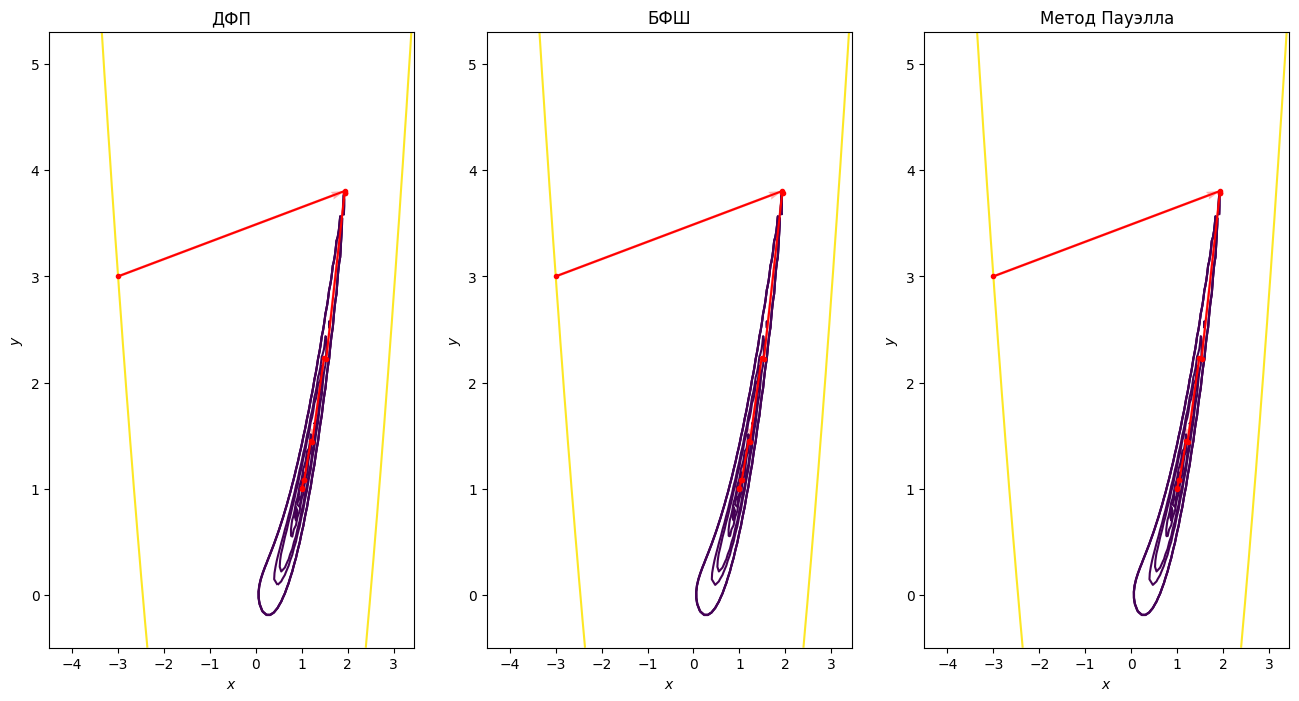

In [30]:
def methods(variant):
    def w(X): return -np.array(Grad_f(X[0], X[1]))
    def fun(X): return f(X[0], X[1])
    A_p, X_p, Y_p = np.empty(0), np.empty(0), np.empty(0)

    X = X0
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    p = w(X)
    g = 1
    n = i = 0
    A = np.eye(2)
    A_p = np.append(A_p, A)

    while np.linalg.norm(w(X)) > eps:
        # минимизируем функцию
        def phi(kappa): return fun(X + kappa * p)
        kappa, arg, k = optimize.golden(phi,brack=(0,10), full_output=True)
        n += k
        
        # находим точку
        Xk = X + kappa * p
        X_p = np.append(X_p, Xk[0])
        Y_p = np.append(Y_p, Xk[1])

        deltaWk = w(Xk) - w(X)
        deltaXk = Xk - X
        deltaXk_wave = deltaXk + np.dot(A, deltaWk)
        i += 1
        g += 1
        if i % 2 == 0:
            A = np.eye(2)
        else:
            if variant ==1:
                #Метод Давидона - Флетчера - Пауэлла
                ro = np.dot(np.dot(A, deltaWk), deltaWk)
                part1 = np.outer(deltaXk, deltaXk) / \
                    np.dot(deltaWk, deltaXk)
                part2 = np.dot(np.outer(np.dot(A, deltaWk), np.transpose(deltaWk)),
                            np.transpose(A)) / ro
                A = A - part1 - part2
            elif variant == 2:
                #Метод Бройдена - Флетчера - Шенно
                ro = np.dot(np.dot(A, deltaWk), deltaWk)
                r = np.dot(A, deltaWk) / ro - deltaXk / np.dot(deltaXk, deltaWk)
                part1 = np.outer(deltaXk, deltaXk) / \
                    np.dot(deltaWk, deltaXk)
                part2 = np.dot(np.outer(np.dot(A, deltaWk), np.transpose(deltaWk)),
                            np.transpose(A)) / ro
                part3 = ro * np.outer(r, np.transpose(r))
                A = A - part1 - part2 + part3
            elif variant ==3:
                #Метод Пауэлла
                q = np.outer(deltaXk_wave, np.transpose(deltaXk_wave)) / \
                np.dot(deltaWk, deltaXk_wave)
                A = A - q

        X = Xk
        p = np.dot(A, w(X))
        A_p = np.append(A_p, A)
    return X, X_p, Y_p, A_p, i, n, g


print(" " * 20, ' Методы второго порядка')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)

# X1, X1_p, Y1_p, A1_p, i1, n1, g1 = methods(1)
# print('Точка минимума: ', X1)
# print('Минимум: ', f(X1[0], X1[1]))
# print('Количество итераций: ', i1)
# print('Количество вызовов: ', n1)
# DrawPoints(X1_p, Y1_p)
# Draw5(X1, X1_p, Y1_p, 1)


# X2, X2_p, Y2_p, A2_p, i2, n2, g2 = methods(2)
# print('Точка минимума: ', X2)
# print('Минимум: ', f(X2[0], X2[1]))
# print('Количество итераций: ', i2)
# print('Количество вызовов: ', n2)
# Draw5(X2, X2_p, Y2_p, 2)


# X3, X3_p, Y3_p, A3_p, i3, n3, g3 = methods(3)
# print('Точка минимума: ', X3)
# print('Минимум: ', f(X3[0], X3[1]))
# print('Количество итераций: ', i3)
# print('Количество вызовов: ', n3)
# Draw5(X3, X3_p, Y3_p, 3)



X1, X1_p, Y1_p, A1_p, i1, n1, g1 = methods(1)
X2, X2_p, Y2_p, A2_p, i2, n2, g2 = methods(2)
X3, X3_p, Y3_p, A3_p, i3, n3, g3 = methods(3)
# DrawPoints(X1_p, Y1_p)
# DrawPoints(X2_p, Y2_p)
# DrawPoints(X3_p, Y3_p)
print()
print('**********************************************************************************************************************************************************************')
print('Методы\t\t\t', '       ДФП\t\t\t', '     БФШ\t\t\t', '   Пауэлла')
print('Xmin  \t',  X1, '\t', X2, '\t', X3)
print('f(Xmin)\t\t\t', f(X1[0], X1[1]), '\t\t\t',
      f(X2[0], X2[1]), '\t\t', f(X3[0], X3[1]))
print('i\t\t\t', i1, '\t\t\t\t\t', i2, '\t\t\t\t\t', i3)
print('n\t\t\t', n1, '\t\t\t\t\t', n2, '\t\t\t\t\t', n3)
print('g\t\t\t', g1, '\t\t\t\t\t', g2, '\t\t\t\t\t', g3)

print('**********************************************************************************************************************************************************************')
DrawSurfContour5(X1, X2, X3, X1_p, Y1_p, X2_p, Y2_p, X3_p, Y3_p)


plt.show()

***Методы прямого поиска***

                      Методы второго порядка
Дано:
Целевая функция:        f(x, y) =  (x - 1)**2 + 5*(x**2 - y)**2
Начальное приближение:  X =  [-3  3]
Точность вычисления:    Eps =  0.001
Точка минимума:  [0.99999986 0.99999971]
Минимум:  1.947400082514148e-14
Количество итераций:  10
Количество вызовов:  1015


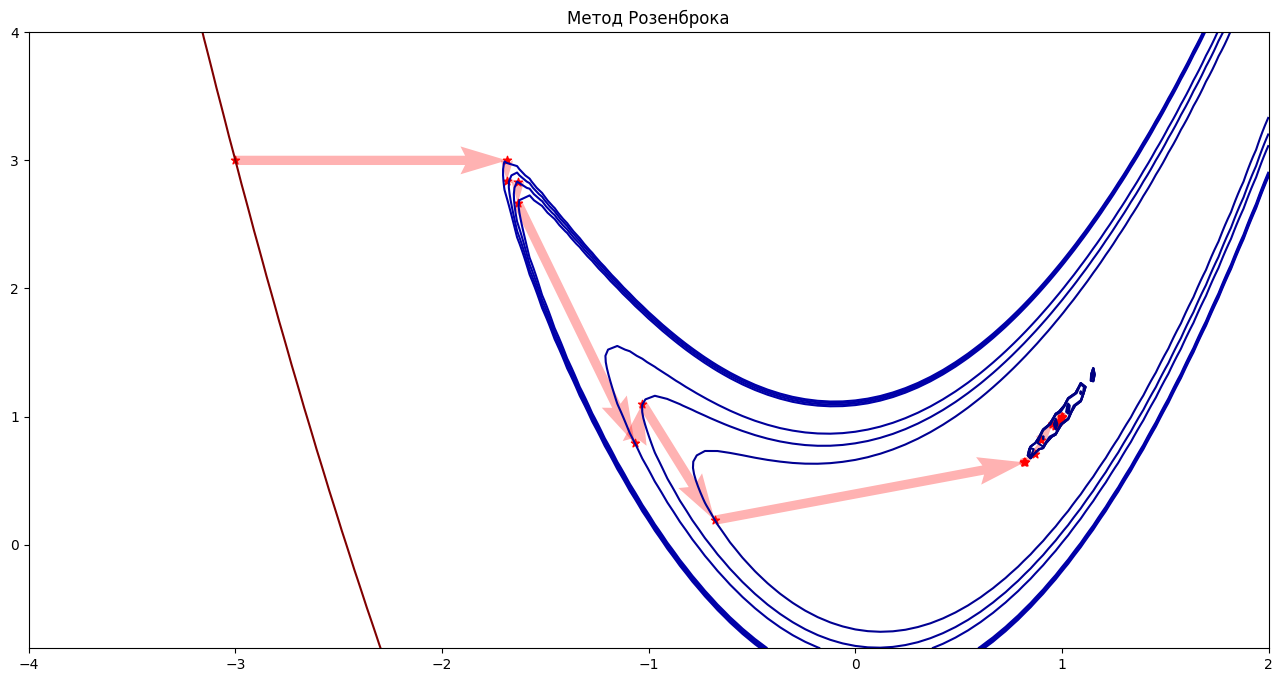

In [31]:
# Метод циклического покоординатного спуска
def cyclic_coordinate_descent():
    def fun(X): return f(X[0], X[1])
    X_p, Y_p = np.empty(0), np.empty(0)

    X = X0
    X_p = np.append(X_p, X[0])
    Y_p = np.append(Y_p, X[1])
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    i = n = 0
    while True:
        def phi_e1(kappa): return fun(X + kappa * e1)
        #kappa, n = golden_ratio(phi_e1, n)
        kappa, arg, k = optimize.golden(phi_e1, full_output=True)
        n += k
        Xk = X + kappa * e1
        X = Xk
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])

        def phi_e2(kappa): return fun(X + kappa * e2)
        # kappa, n = golden_ratio(phi_e2, n)
        kappa, arg, k = optimize.golden(phi_e2, full_output=True)
        n += k
        Xk = X + kappa * e2
        X_p = np.append(X_p, Xk[0])
        Y_p = np.append(Y_p, Xk[1])
        i += 2
        if np.linalg.norm(Xk - X) < eps and (fun(Xk) - fun(X) < eps):
            break
        X = Xk
    return X, X_p, Y_p, i, n

#Метод Хука - Дживса
def HukaDgivsa():
    def fun(X): return f(X[0], X[1])
    X_p, Y_p = np.empty(0), np.empty(0)

    X = X_wave_k = X1 = X0
    j_f = fun(X1)

    X_p = np.append(X_p, X0[0])
    Y_p = np.append(Y_p, X0[1])
    
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    b = np.array([1, 1])

    gamma = 2
    a = 2
    
    n = 0
    i = 1

    while True:
        #выбирает точку 2 от второго базисного вектора
        plus_f = fun(X1 + b[0] * e1)
        minus_f = fun(X1 - b[0] * e1)
    
        if (plus_f < j_f and plus_f <= minus_f):
            X2 = X1 + b[0] * e1
        elif (minus_f < j_f and minus_f < plus_f):
            X2 = X1 - b[0] * e1
        else:
            X2 = X1
        # print('X2 = ', X2)

        #выбирает точку 2 от второго базисного вектора
        plus_f = fun(X2 + b[1] * e2)
        minus_f = fun(X2 - b[1] * e2)
        j_f = fun(X2)

        if (plus_f < j_f and plus_f <= minus_f):
            X3 = X2 + b[1] * e2
        elif (minus_f < j_f and minus_f < plus_f):
            X3 = X2 - b[1] * e2
        else:
            X3 = X2
        # print('X3 = ', X3)
        n += 5
        
        #если точка оказалась прежней, уменьшаем шаг b*e_j
        if (X3 == X_wave_k).all():
            b = b / gamma
            # print(b)
            X1 = X_wave_k
            # print(X1)
            j_f = fun(X_wave_k)
            continue

        if (X2[0] != X1[0] or X2[1] != X1[1]):    
            X_p = np.append(X_p, X2[0])
            Y_p = np.append(Y_p, X2[1])
        if (X2[0] != X3[0] or X2[1] != X3[1]):   
            X_p = np.append(X_p, X3[0])
            Y_p = np.append(Y_p, X3[1])

        if np.linalg.norm(X3 - X_wave_k) < eps:
            break
        
        #одномерная оптимизация
        def phi(a): return fun(X_wave_k + a * (X3 - X_wave_k))
        a, arg, k = optimize.golden(phi, full_output=True)
        n += k

        #точка
        X = X1 + a * (X3 - X1)
        # print('X = ', X)
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])
        X1 = X_wave_k = X
        j_f = fun(X)
        i += 1
        # print('i = ', i)
    return X, X_p, Y_p, i, n
 

#Метод Розенброка
def Rozenbrok():
    def fun(X): return f(X[0], X[1])
    X_p, Y_p = np.empty(0), np.empty(0)

    X_wave_k = X1 = X0

    X_p = np.append(X_p, X0[0])
    Y_p = np.append(Y_p, X0[1])
    
    p1 = np.array([1, 0])
    p2 = np.array([0, 1])
    
    n = 0
    i = 1

    while True:
        def ksi_1(kappa1): return fun(X1 + kappa1 * p1)
        kappa1, arg, k = optimize.golden(ksi_1, full_output=True)
        n += k
        X2 = X1 + kappa1 * p1
        X_p = np.append(X_p, X2[0])
        Y_p = np.append(Y_p, X2[1])

        def ksi_2(kappa2): return fun(X2 + kappa2 * p2)
        kappa2, arg, k = optimize.golden(ksi_2, full_output=True)
        n += k
        X3 = X2 + kappa2 * p2

        X = X3
        X_p = np.append(X_p, X[0])
        Y_p = np.append(Y_p, X[1])

        if np.linalg.norm(X - X1) < eps:
            break

        
        if kappa1 == 0:
            a1 = p1
        else:
            a1 = kappa1 * p1 + kappa2 * p2

        if kappa2 == 0:
            a2 = p2
        else:
            a2 = kappa2 * p2

        b1 = a1
        b2 = a2 - np.dot(a2, p1) * p1

        p1 = b1 / np.linalg.norm(b1)
        p2 = b2 / np.linalg.norm(b2) 

        X1 = X
        i += 1
    return X, X_p, Y_p, i, n




print(" " * 20, ' Методы второго порядка')
print('Дано:')
print('Целевая функция:        f(x, y) = ', f(x_sym, y_sym))
print('Начальное приближение:  X = ', X0)
print('Точность вычисления:    Eps = ', eps)

# X1, X1_p, Y1_p, i1, n1 = cyclic_coordinate_descent()
# print('Точка минимума: ', X1)
# print('Минимум: ', f(X1[0], X1[1]))
# print('Количество итераций: ', i1)
# print('Количество вызовов: ', n1)
# Draw6(X1, X1_p, Y1_p, 1)


# X2, X2_p, Y2_p, i2, n2 = HukaDgivsa()
# print('Точка минимума: ', X2)
# print('Минимум: ', f(X2[0], X2[1]))
# print('Количество итераций: ', i2)
# print('Количество вызовов: ', n2)
# Draw6(X2, X2_p, Y2_p, 2)


X3, X3_p, Y3_p, i3, n3 = Rozenbrok()
print('Точка минимума: ', X3)
print('Минимум: ', f(X3[0], X3[1]))
print('Количество итераций: ', i3)
print('Количество вызовов: ', n3)
Draw6(X3, X3_p, Y3_p, 3)


# X1, X1_p, Y1_p, i1, n1= cyclic_coordinate_descent()
# X2, X2_p, Y2_p, i2, n2 = HukaDgivsa()
# X3, X3_p, Y3_p, i3, n3 = Rozenbrok()
# # DrawPoints(X1_p, Y1_p)
# # DrawPoints(X2_p, Y2_p)
# # DrawPoints(X3_p, Y3_p)
# print()
# print('**********************************************************************************************************************************************************************')
# print('Методы\t\t\t', '       ЦПС\t\t\t', '     Хука - Дживса\t\t\t', '   Розенброка')
# print('Xmin  \t\t',  X1, '\t\t', X2, '\t', X3)
# print('f(Xmin)\t\t\t', f(X1[0], X1[1]), '\t\t\t',
#       f(X2[0], X2[1]), '\t\t', f(X3[0], X3[1]))
# print('i\t\t\t', i1, '\t\t\t\t\t', i2, '\t\t\t\t\t', i3)
# print('n\t\t\t', n1, '\t\t\t\t\t', n2, '\t\t\t\t\t', n3)

# print('**********************************************************************************************************************************************************************')
# DrawSurfContour6(X1, X2, X3, X1_p, Y1_p, i1, n1, X2_p, Y2_p, i2, n2, X3_p, Y3_p, i3, n3)


plt.show()

***Симплекс методы***

C:\Users\griho\AppData\Local\Temp\ipykernel_65996\4198515055.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  x_simplex[1] = np.array([x_simplex[0][0] + L * (sqrt(n+1)+n-1)/(n*sqrt(2)), x_simplex[0][1] + L * (sqrt(n+1)-1)/(n*sqrt(2))])
C:\Users\griho\AppData\Local\Temp\ipykernel_65996\4198515055.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  x_simplex[2] = np.array([x_simplex[0][0] + L * (sqrt(n+1)-1)/(n*sqrt(2)), x_simplex[0][1] + L * (sqrt(n+1)+n-1)/(n*sqrt(2))])
C:\Users\griho\AppData\Local\Temp\ipykernel_65996\4198515055.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  x31[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 - (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
C:\Users\griho\AppData\Local\Temp\ipykernel_65996\4198515055.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
  x31[1] += (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 + (x_s

Аргумент, x_min = [ 0.9362175422546386 ,  0.8763439740494237 ]
Значение, f(x_min) =  50.33146344090445
Кол-во итераций, iter =  188
Кол-во вызовов функции, value =  1650


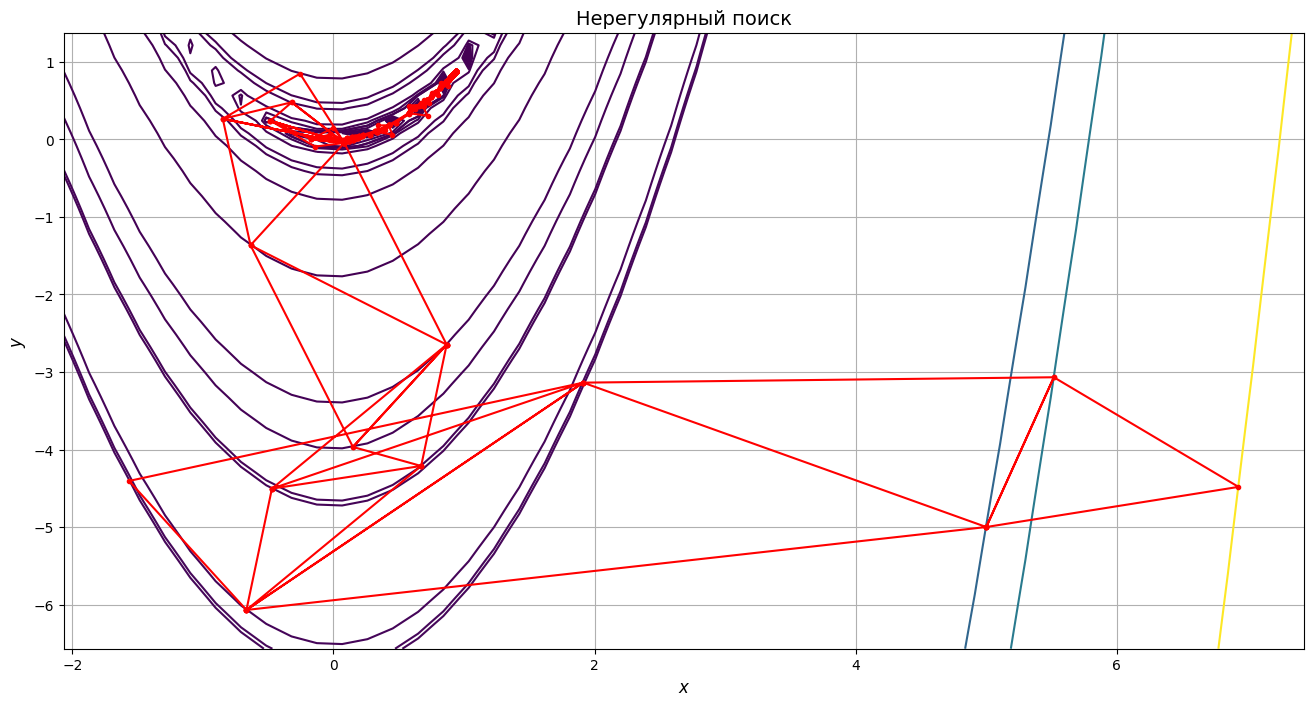

In [32]:
def lab7_methods(f, eps, x, flag):
    n_f = 0
    n_g = 0
    n_d = 0
    L = 2
    xk = [[x[0]],[x[1]]]    
    levels_mass = [[],[]]
    n = 2
    

     #добавляет элементы
    def my_append(xk, x_simplex):
        xk[0].append(x_simplex[0][0])
        xk[1].append(x_simplex[0][1])
        xk[0].append(x_simplex[1][0])
        xk[1].append(x_simplex[1][1])
        xk[0].append(x_simplex[2][0])
        xk[1].append(x_simplex[2][1])
        xk[0].append(x_simplex[0][0])
        xk[1].append(x_simplex[0][1])
        return xk
    x_simplex = np.zeros((n+1, n))

    tmp = []
    
    x_simplex[0] = np.array(x)
    x_simplex[1] = np.array([x_simplex[0][0] + L * (sqrt(n+1)+n-1)/(n*sqrt(2)), x_simplex[0][1] + L * (sqrt(n+1)-1)/(n*sqrt(2))])
    x_simplex[2] = np.array([x_simplex[0][0] + L * (sqrt(n+1)-1)/(n*sqrt(2)), x_simplex[0][1] + L * (sqrt(n+1)+n-1)/(n*sqrt(2))])

    x_simplex = np.array(sorted(x_simplex, key = lambda x: f(x)))

    xk = my_append(xk,x_simplex)

    while True:

        n_d += 1  
        
        if flag == 1:
            
            x_temp = x_simplex[2] + 2 * (x_simplex[0] - x_simplex[2]) + (x_simplex[1] - x_simplex[0])

            if f(x_temp) < f(x_simplex[2]):
                n_f += 2
                x_simplex[2] = x_temp

                xk = my_append(xk,x_simplex)
    
            else:

                x_temp = x_simplex[1] + 2 * (x_simplex[0] - x_simplex[1]) + (x_simplex[2] - x_simplex[0])

                if f(x_temp) < f(x_simplex[1]):
                    n_f += 2
                    x_simplex[1] = x_temp

                    xk = my_append(xk,x_simplex)

                else:
                    x_temp = x_simplex[0] + 2 * (x_simplex[1] - x_simplex[0]) + (x_simplex[2] - x_simplex[1])

                    if f(x_temp) < f(x_simplex[0]):
                        n_f += 2
                        x_simplex[0] = x_temp

                        xk = my_append(xk,x_simplex)

                    else:
                        L *= delta 
                        x_simplex[1] = x_simplex[0] + delta * (x_simplex[1] - x_simplex[0])
                        x_simplex[2] = x_simplex[0] + delta * (x_simplex[2] - x_simplex[0])
                        xk = my_append(xk,x_simplex)
            
            x_simplex = np.array(sorted(x_simplex, key = lambda x: f(x)))       
            #print(x_simplex, "\n")
            if L < eps:                
                break

            x_c = np.zeros(2)
            for i in x_simplex:
                x_c += i
            x_c /= 3

    
            levels_mass.append(x_c)
            

        elif flag == 2:

            x_c = np.zeros(2)
            for i in x_simplex:
                x_c += i
            x_c /= 3

            if n_d % 8 == 0:
                
                x_simplex = np.array(sorted(x_simplex, key = lambda x: f(x)))
                L = sqrt( (x_simplex[0][0] - x_simplex[1][0] )**2 +  (x_simplex[0][1] - x_simplex[1][1] )**2 )
                
                x31 =  x_simplex[0].copy()
                x32 =  x_simplex[0].copy()
                #print(x31, x32)
                
                x31[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 - (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
                x31[1] += (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 + (x_simplex[1][1] - x_simplex[0][1]) * 1/2
                x32[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 + (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
                x32[1] += - (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 - (x_simplex[1][1] - x_simplex[0][1]) * 1/2   

                x_simplex[2] = np.array(sorted([x31, x32], key = lambda x: f(x)))[0]
                
                xk = my_append(xk,x_simplex)

                x_simplex = np.array(sorted(x_simplex, key = lambda x: f(x))) 
            
            else:
                x_temp = []
                x_temp.append((1+alp)/2 * (x_simplex[0] + x_simplex[1]) - alp*x_simplex[2])
                x_temp.append((1-beta)/2 * (x_simplex[0] + x_simplex[1]) + beta*x_temp[0])
                x_temp.append((1-gamma)/2 * (x_simplex[0] + x_simplex[1]) + gamma*x_temp[0])
                x_temp.append((1-gamma)/2 * (x_simplex[0] + x_simplex[1]) + gamma * x_simplex[2])

                x_temp = np.array(sorted(x_temp, key = lambda x: f(x)))[0]
                
                n_f += 4
                
                if f(x_temp) < f(x_simplex[2]):
                    x_simplex[2] = x_temp
                    n_f += 2

                else:
                    x_simplex[1] = x_simplex[0] + delta * (x_simplex[1] - x_simplex[0])
                    x_simplex[2] = x_simplex[0] + delta * (x_simplex[2] - x_simplex[0])
                
                
                xk = my_append(xk,x_simplex)

                x_simplex = np.array(sorted(x_simplex, key = lambda x: f(x)))  

                n_f += 4

                if 1/3 * ( (f(x_simplex[0]) - f(x_c)) ** 2 + (f(x_simplex[1]) - f(x_c)) ** 2 + (f(x_simplex[2]) - f(x_c)) ** 2 ) < eps**2 :
                    break

                x_c = np.zeros(2)
                for i in x_simplex:
                    x_c += i
                x_c /= 3

                levels_mass[0].append(x_c[0])
                levels_mass[1].append(x_c[1])

        
    return x_c, xk, n_f, n_d, levels_mass


def Rosenbrock(X):
    return alpha * (X[0]**2 - X[1])**2 + (X[0] - 1)**2

def f1(X):
    return 10*X[0]**2 - 4* X[0] * X[1] + 7 * X[1]**2 - 4 * math.sqrt(5) * (5*X[0] -X[1]) - 16    

def f2(X):
    return 6*X[0]**2 - 4* X[0] * X[1] + 3 * X[1]**2 + 4 * math.sqrt(5) * (X[0] +  2* X[1]) +22  

alpha = 133
x0 = np.array([5, -5])
x_min, xk,  n_f, n_d, levels_mass = lab7_methods(Rosenbrock, 1e-6, x0, 2)
print('Аргумент, x_min = [', x_min[0],', ',x_min[1],']')
print('Значение, f(x_min) = ',f2(x_min))
print('Кол-во итераций, iter = ',n_d)
print('Кол-во вызовов функции, value = ', n_f)
draw_counterplot(x_min, xk, 2, Rosenbrock)


***Метод Недлера-Мида (встроенный)***

In [33]:
alpha = 30
def Rosenbrock(X):
    return alpha * (X[0]**2 - X[1])**2 + (X[0] - 1)**2

def f1(X):
    return 6*X[0]**2 - 4* X[0] * X[1] + 3 * X[1]**2 + 4 * math.sqrt(5) * (X[0] +  2* X[1]) +22    

def f2(X):
    return 10*X[0]**2 - 4* X[0] * X[1] + 7 * X[1]**2 - 4 * math.sqrt(5) * (5*X[0] -X[1]) - 16    

# Начальная точка поиска минимума функции
X0 = np.array([5, -5])
xtol = 1.0e-3 # Точность поиска экстремума
# Находим минимум функции
res = opt.minimize(Rosenbrock, X0, method = 'Nelder-Mead', options = {'xtol': xtol, 'disp': True})
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 53
         Function evaluations: 106
 final_simplex: (array([[1.00000593, 1.00001841],
       [1.00003548, 1.00007473],
       [0.99996942, 0.99993308]]), array([1.32299727e-09, 1.68495736e-09, 1.93333466e-09]))
           fun: 1.3229972668489553e-09
       message: 'Optimization terminated successfully.'
          nfev: 106
           nit: 53
        status: 0
       success: True
             x: array([1.00000593, 1.00001841])


C:\Users\griho\AppData\Local\Temp\ipykernel_65996\3308551297.py:15: OptimizeWarning: Unknown solver options: xtol
  res = opt.minimize(Rosenbrock, X0, method = 'Nelder-Mead', options = {'xtol': xtol, 'disp': True})


***Методы последовательной безусловной ми-нимизации***